In [1]:
import re
import numpy as np
import pandas as pd

In [2]:
#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [3]:
#spacy for lemmatization
import spacy

In [4]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Remove deprecationWarning that I can't fix
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from pprint import pprint

/Users/root1/Documents/lda/myvenv/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
# NLTK for removing stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['say'])

In [7]:
# Import CSV OrdinacDataset
df = pd.read_csv('ordinances/bbc-text.csv', header = 0)
print(df)
df.head()

           category                                               text
0              tech  tv future in the hands of viewers with home th...
1          business  worldcom boss  left books alone  former worldc...
2             sport  tigers wary of farrell  gamble  leicester say ...
3             sport  yeading face newcastle in fa cup premiership s...
4     entertainment  ocean s twelve raids box office ocean s twelve...
...             ...                                                ...
2220       business  cars pull down us retail figures us retail sal...
2221       politics  kilroy unveils immigration policy ex-chatshow ...
2222  entertainment  rem announce new glasgow concert us band rem h...
2223       politics  how political squabbles snowball it s become c...
2224          sport  souness delight at euro progress boss graeme s...

[2225 rows x 2 columns]


,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [8]:
# List all ordinance titles
# Convert to list
data = list(df.text) 
print(data[:1])

['tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to hig

In [9]:
# Remove qoutes
data = [re.sub("\'", "", sent) for sent in data]
# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]
pprint(data[:5])

['tv future in the hands of viewers with home theatre systems plasma '
 'high-definition tvs and digital video recorders moving into the living room '
 'the way people watch tv will be radically different in five years time. that '
 'is according to an expert panel which gathered at the annual consumer '
 'electronics show in las vegas to discuss how these new technologies will '
 'impact one of our favourite pastimes. with the us leading the trend '
 'programmes and other content will be delivered to viewers via home networks '
 'through cable satellite telecoms companies and broadband service providers '
 'to front rooms and portable devices. one of the most talked-about '
 'technologies of ces has been digital and personal video recorders (dvr and '
 'pvr). these set-top boxes like the us s tivo and the uk s sky+ system allow '
 'people to record store play pause and forward wind tv programmes when they '
 'want. essentially the technology allows for much more personalised tv. they 

In [10]:
#preprocess using gensim simple_preprocess and tokenize into words
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

pprint(data_words[:4])

[['tv',
  'future',
  'in',
  'the',
  'hands',
  'of',
  'viewers',
  'with',
  'home',
  'theatre',
  'systems',
  'plasma',
  'high',
  'definition',
  'tvs',
  'and',
  'digital',
  'video',
  'recorders',
  'moving',
  'into',
  'the',
  'living',
  'room',
  'the',
  'way',
  'people',
  'watch',
  'tv',
  'will',
  'be',
  'radically',
  'different',
  'in',
  'five',
  'years',
  'time',
  'that',
  'is',
  'according',
  'to',
  'an',
  'expert',
  'panel',
  'which',
  'gathered',
  'at',
  'the',
  'annual',
  'consumer',
  'electronics',
  'show',
  'in',
  'las',
  'vegas',
  'to',
  'discuss',
  'how',
  'these',
  'new',
  'technologies',
  'will',
  'impact',
  'one',
  'of',
  'our',
  'favourite',
  'pastimes',
  'with',
  'the',
  'us',
  'leading',
  'the',
  'trend',
  'programmes',
  'and',
  'other',
  'content',
  'will',
  'be',
  'delivered',
  'to',
  'viewers',
  'via',
  'home',
  'networks',
  'through',
  'cable',
  'satellite',
  'telecoms',
  'companies

In [11]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
pprint(trigram_mod[bigram_mod[data_words[1]]])

['worldcom',
 'boss',
 'left',
 'books',
 'alone',
 'former',
 'worldcom',
 'boss_bernie_ebbers',
 'who',
 'is',
 'accused',
 'of',
 'overseeing',
 'an',
 'bn',
 'bn',
 'fraud',
 'never',
 'made',
 'accounting',
 'decisions',
 'witness',
 'has',
 'told',
 'jurors',
 'david',
 'myers',
 'made',
 'the',
 'comments',
 'under',
 'questioning',
 'by',
 'defence',
 'lawyers',
 'who',
 'have',
 'been',
 'arguing',
 'that',
 'mr',
 'ebbers',
 'was',
 'not',
 'responsible',
 'for',
 'worldcom',
 'problems',
 'the',
 'phone',
 'company',
 'collapsed',
 'in',
 'and',
 'prosecutors',
 'claim',
 'that',
 'losses',
 'were',
 'hidden',
 'to',
 'protect',
 'the',
 'firm',
 'shares',
 'mr',
 'myers',
 'has',
 'already',
 'pleaded_guilty',
 'to',
 'fraud',
 'and',
 'is',
 'assisting',
 'prosecutors',
 'on',
 'monday',
 'defence',
 'lawyer',
 'reid',
 'weingarten',
 'tried',
 'to',
 'distance',
 'his',
 'client',
 'from',
 'the',
 'allegations',
 'during',
 'cross',
 'examination',
 'he',
 'asked',
 'mr'

In [12]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
# Code snippets from Selva Prabhakaran | Topic Modeling with Gensim (Python)
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [13]:
# Remove Stop Words and Form Bigrams
data_words_nostops = remove_stopwords(data_words)

data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)

nlp = spacy.load('en', disable=['parser', 'ner'])

# Lematize keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

pprint(data_lemmatized[:1])

[['tv',
  'future',
  'hand',
  'viewer',
  'system',
  'high_definition',
  'tv',
  'digital',
  'video_recorder',
  'move',
  'living_room',
  'way',
  'people',
  'watch',
  'tv',
  'radically',
  'different',
  'year',
  'time',
  'accord',
  'expert',
  'panel',
  'gather',
  'annual',
  'show',
  'las_vegas',
  'discuss',
  'new',
  'technology',
  'impact',
  'favourite',
  'pastime',
  'lead',
  'trend',
  'programme',
  'content',
  'deliver',
  'viewer',
  'home',
  'network',
  'cable',
  'satellite',
  'telecom',
  'company',
  'broadband',
  'service_provider',
  'front',
  'room',
  'talk',
  'technology',
  'ce',
  'digital',
  'personal',
  'video_recorder',
  'dvr',
  'pvr',
  'set',
  'sky',
  'system',
  'allow',
  'people',
  'record',
  'store',
  'play',
  'pause',
  'forward',
  'wind',
  'want',
  'essentially',
  'technology',
  'allow',
  'much',
  'personalise',
  'tv',
  'also',
  'build',
  'high_definition',
  'tv',
  'set',
  'big',
  'business',
  'slow'

In [14]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 2), (6, 1), (7, 3), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 6), (15, 2), (16, 2), (17, 1), (18, 1), (19, 2), (20, 1), (21, 2), (22, 1), (23, 3), (24, 1), (25, 2), (26, 1), (27, 1), (28, 3), (29, 1), (30, 1), (31, 1), (32, 4), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 2), (41, 1), (42, 1), (43, 3), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 2), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 2), (63, 1), (64, 2), (65, 1), (66, 2), (67, 1), (68, 1), (69, 1), (70, 2), (71, 1), (72, 1), (73, 1), (74, 3), (75, 1), (76, 3), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 2), (83, 2), (84, 1), (85, 1), (86, 1), (87, 3), (88, 1), (89, 2), (90, 1), (91, 1), (92, 1), (93, 1), (94, 2), (95, 2), (96, 1), (97, 2), (98, 4), (99, 1), (100, 1), (101, 2), (102, 2), (103, 1), (104, 1), (105, 3), (106, 1), (107, 5), (108, 3), (109, 1), (110, 2)

In [15]:
id2word[0]

'abide'

In [16]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('abide', 1),
  ('accord', 1),
  ('add', 1),
  ('advert', 1),
  ('advertising', 2),
  ('allow', 2),
  ('already', 1),
  ('also', 3),
  ('announce', 1),
  ('annual', 1),
  ('available', 1),
  ('big', 2),
  ('bill_gate', 1),
  ('box', 1),
  ('brand', 6),
  ('broadband', 2),
  ('build', 2),
  ('business', 1),
  ('button', 1),
  ('cable', 2),
  ('call', 1),
  ('capability', 2),
  ('ce', 1),
  ('channel', 3),
  ('chief', 1),
  ('choice', 2),
  ('comfortable', 1),
  ('communication', 1),
  ('company', 3),
  ('concern', 1),
  ('connection', 1),
  ('consumer', 1),
  ('content', 4),
  ('control', 1),
  ('could', 1),
  ('crystal', 1),
  ('deliver', 1),
  ('device', 1),
  ('diaper', 1),
  ('different', 1),
  ('digital', 2),
  ('discuss', 1),
  ('display', 1),
  ('dvr', 3),
  ('end', 1),
  ('enhance', 1),
  ('essentially', 1),
  ('even', 1),
  ('everywhere', 1),
  ('example', 1),
  ('experience', 1),
  ('expert', 1),
  ('external', 1),
  ('familiar', 1),
  ('favourite', 1),
  ('find', 2),
  ('fi

In [17]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=30,
                                           alpha='auto',
                                           per_word_topics=True)

In [18]:
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.017*"say" + 0.015*"people" + 0.015*"use" + 0.009*"technology" + 0.007*"music" + 0.007*"make" + 0.007*"computer" + 0.007*"service" + 0.007*"net" + 0.007*"user"'), (1, '0.022*"say" + 0.019*"year" + 0.016*"film" + 0.013*"sale" + 0.010*"rise" + 0.010*"company" + 0.008*"also" + 0.008*"firm" + 0.007*"market" + 0.007*"last"'), (2, '0.031*"say" + 0.019*"would" + 0.017*"government" + 0.010*"plan" + 0.010*"people" + 0.009*"party" + 0.008*"country" + 0.008*"labour" + 0.008*"election" + 0.007*"also"'), (3, '0.039*"say" + 0.010*"would" + 0.006*"make" + 0.006*"tell" + 0.005*"law" + 0.005*"people" + 0.005*"also" + 0.005*"case" + 0.005*"could" + 0.004*"take"'), (4, '0.012*"good" + 0.012*"game" + 0.012*"play" + 0.011*"say" + 0.011*"year" + 0.011*"go" + 0.009*"time" + 0.009*"get" + 0.009*"first" + 0.008*"take"')]


In [19]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.6811364377488935

Coherence Score:  0.4002169073453465


In [20]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.057427  0.222997       1        1  24.060490
3      0.172236 -0.087784       2        1  22.356732
0     -0.002466 -0.010306       3        1  19.082500
1     -0.230736 -0.011654       4        1  18.309707
2      0.003540 -0.113253       5        1  16.190571, topic_info=           Term         Freq        Total Category  logprob  loglift
394        film   982.000000   982.000000  Default  30.0000  30.0000
480  government   992.000000   992.000000  Default  29.0000  29.0000
626        sale   817.000000   817.000000  Default  28.0000  28.0000
120        play  1016.000000  1016.000000  Default  27.0000  27.0000
176         use  1423.000000  1423.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
179        want   244.379376  1033.754716   Topic5  -5.4097   0.3785
187        year   298.346581  2786.447331   Topic5  -5.2102  -0.4135
242        make   235.690918  2014.274133   Topic5  -5.4459  -0.3248
288          go   222.690009  1738.323852   Topic5  -5.5027  -0.2342
354       money   189.404155   438.387953   Topic5  -5.6646   0.9815

[346 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1278      1  0.207786   action
1278      2  0.723255   action
1278      5  0.067930   action
958       4  0.995266    actor
4095      4  0.994034  actress
...     ...       ...      ...
187       1  0.328734     year
187       2  0.082184     year
187       3  0.050602     year
187       4  0.431015     year
187       5  0.106946     year

[575 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 1, 2, 3])

In [21]:
# Build Mallet LDA Model
mallet_path = '/Users/root1/Documents/lda/mallet/bin/mallet'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=5, id2word=id2word)

In [22]:
# Show Topics
# Only few topics make sense for me
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('year', 0.03107190823623362),
   ('company', 0.014247341101310393),
   ('month', 0.014229191622200443),
   ('sale', 0.012160151003666195),
   ('rise', 0.011833460379687103),
   ('firm', 0.011670115067697558),
   ('market', 0.011053032777959272),
   ('expect', 0.010272605176231442),
   ('share', 0.010018512468692148),
   ('high', 0.009746270282042906)]),
 (1,
  [('people', 0.01717101958814666),
   ('film', 0.014957935710698141),
   ('music', 0.012650678051230537),
   ('show', 0.01156767955801105),
   ('make', 0.010908463083877449),
   ('technology', 0.009919638372677047),
   ('include', 0.009291813159216475),
   ('number', 0.0085541185334003),
   ('good', 0.008051858362631843),
   ('service', 0.007816423907584129)]),
 (2,
  [('government', 0.02091460771564803),
   ('plan', 0.014304291287386216),
   ('people', 0.014250108365843086),
   ('make', 0.010637913596301113),
   ('work', 0.009807108799306458),
   ('country', 0.009084669845398064),
   ('labour', 0.009084669845398064),
   

In [23]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [24]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

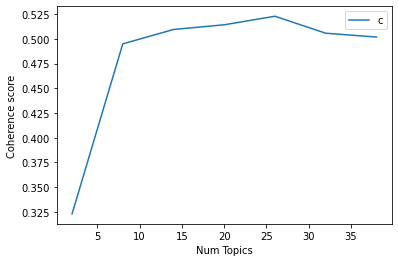

In [25]:
# Show graph to find optimal number of topics
# Coherence value not going flat seems unlikely or probably wrong
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [26]:
# Print the coherence scores with increasing number of topics

for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.323
Num Topics = 8  has Coherence Value of 0.4949
Num Topics = 14  has Coherence Value of 0.5095
Num Topics = 20  has Coherence Value of 0.5142
Num Topics = 26  has Coherence Value of 0.5229
Num Topics = 32  has Coherence Value of 0.5057
Num Topics = 38  has Coherence Value of 0.5018


In [27]:
# Select the model and print the topics
optimal_model = model_list[2] # when number of topics is 8
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.023*"technology" + 0.015*"phone" + 0.015*"service" + 0.014*"music" + '
  '0.013*"people" + 0.012*"video" + 0.012*"mobile" + 0.011*"game" + '
  '0.011*"offer" + 0.010*"device"'),
 (1,
  '0.046*"film" + 0.042*"good" + 0.026*"year" + 0.024*"include" + '
  '0.021*"music" + 0.020*"award" + 0.016*"number" + 0.015*"top" + 0.012*"star" '
  '+ 0.012*"director"'),
 (2,
  '0.045*"year" + 0.030*"rise" + 0.022*"month" + 0.022*"fall" + 0.020*"figure" '
  '+ 0.019*"economy" + 0.018*"sale" + 0.018*"growth" + 0.018*"high" + '
  '0.016*"price"'),
 (3,
  '0.036*"show" + 0.020*"make" + 0.019*"child" + 0.018*"life" + 0.015*"woman" '
  '+ 0.014*"time" + 0.012*"day" + 0.011*"family" + 0.011*"live" + '
  '0.010*"young"'),
 (4,
  '0.044*"company" + 0.037*"firm" + 0.029*"share" + 0.019*"deal" + '
  '0.018*"business" + 0.015*"offer" + 0.015*"buy" + 0.015*"sell" + '
  '0.012*"sale" + 0.011*"market"'),
 (5,
  '0.036*"country" + 0.030*"year" + 0.024*"world" + 0.010*"make" + '
  '0.009*"project" + 0.009*"n

In [28]:
# Finding the dominant topic in each sentence
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.5335,"technology, phone, service, music, people, vid...",tv future in the hands of viewers with home th...
1,1,4.0,0.2518,"company, firm, share, deal, business, offer, b...",worldcom boss left books alone former worldcom...
2,2,12.0,0.2049,"game, play, player, win, year, team, match, go...",tigers wary of farrell gamble leicester say th...
3,3,12.0,0.4097,"game, play, player, win, year, team, match, go...",yeading face newcastle in fa cup premiership s...
4,4,1.0,0.3717,"film, good, year, include, music, award, numbe...",ocean s twelve raids box office ocean s twelve...
5,5,11.0,0.3792,"labour, election, party, tory, plan, issue, cl...",howard hits back at mongrel jibe michael howar...
6,6,11.0,0.2594,"labour, election, party, tory, plan, issue, cl...",blair prepares to name poll date tony blair is...
7,7,6.0,0.2141,"set, time, half, back, run, point, give, lead,...",henman hopes ended in dubai third seed tim hen...
8,8,12.0,0.2381,"game, play, player, win, year, team, match, go...",wilkinson fit to face edinburgh england captai...
9,9,3.0,0.2913,"show, make, child, life, woman, time, day, fam...",last star wars not for children the sixth and ...


In [29]:
# Convert malletmodel to to gensim lda model for pyLDAvis
model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, corpus, id2word)
vis

/Users/root1/Documents/lda/myvenv/lib/python3.9/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/Users/root1/Documents/lda/myvenv/lib/python3.9/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/Users/root1/Documents/lda/myvenv/lib/python3.9/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.068135 -0.119186       1        1  22.526143
2      0.109412 -0.009379       2        1  20.142269
3     -0.066146 -0.266621       3        1  19.507259
0     -0.277914  0.248642       4        1  19.305243
4      0.302782  0.146544       5        1  18.519087, topic_info=           Term         Freq        Total Category  logprob  loglift
187        year  3574.000000  3574.000000  Default  30.0000  30.0000
480  government  1421.000000  1421.000000  Default  29.0000  29.0000
287        game  1569.000000  1569.000000  Default  28.0000  28.0000
120        play  1318.000000  1318.000000  Default  27.0000  27.0000
394        film  1137.000000  1137.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
255     problem   294.480004   553.507926   Topic5  -5.3576   1.0553
205       claim   308.205767   702.271942   Topic5  -5.3120   0.8628
346        hold   293.232208   652.162828   Topic5  -5.3619   0.8870
395      follow   277.010852   622.384082   Topic5  -5.4188   0.8769
301         man   258.293902   476.233422   Topic5  -5.4887   1.0746

[424 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1865      3  0.995348  absence
2858      5  1.001766   absurd
1278      5  1.000384   action
958       1  1.000490    actor
2         1  0.016194      add
...     ...       ...      ...
911       4  0.235706    world
2823      5  1.001766  wrangle
187       1  0.119187     year
187       3  0.314476     year
187       4  0.566280     year

[517 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 1, 5])